## Integrated CA 2

### Modules
### Data Preparation
### Statistics
### Machine Learning

### Contents
### 1. Introduction
### 2. Business Understanding
### 3. Data Understanding
### 4. Data Preparation

## 1. Introduction

Introduction...

#### Libraries

In [140]:
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statistics as stats
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import missingno as msno



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Employee_Attrition.csv")

## 2. Business Understanding

The main task of this project is to analyse the 

## 3. Data Understanding

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [4]:
df.shape

(1470, 35)

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [6]:
df.describe(include="object").T

,count,unique,top,freq
Attrition,1323,2,No,1065
BusinessTravel,1323,3,Travel_Rarely,890
Department,1323,3,Research & Development,824
EducationField,1323,6,Life Sciences,504
Gender,1323,2,Male,783
JobRole,1323,9,Sales Executive,281
MaritalStatus,1323,3,Married,596
Over18,1323,1,Y,1323
OverTime,1323,2,No,929


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

In [8]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [9]:
# missing data seems like 10 random data points from each column?
df.isnull().head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False


<Axes: >

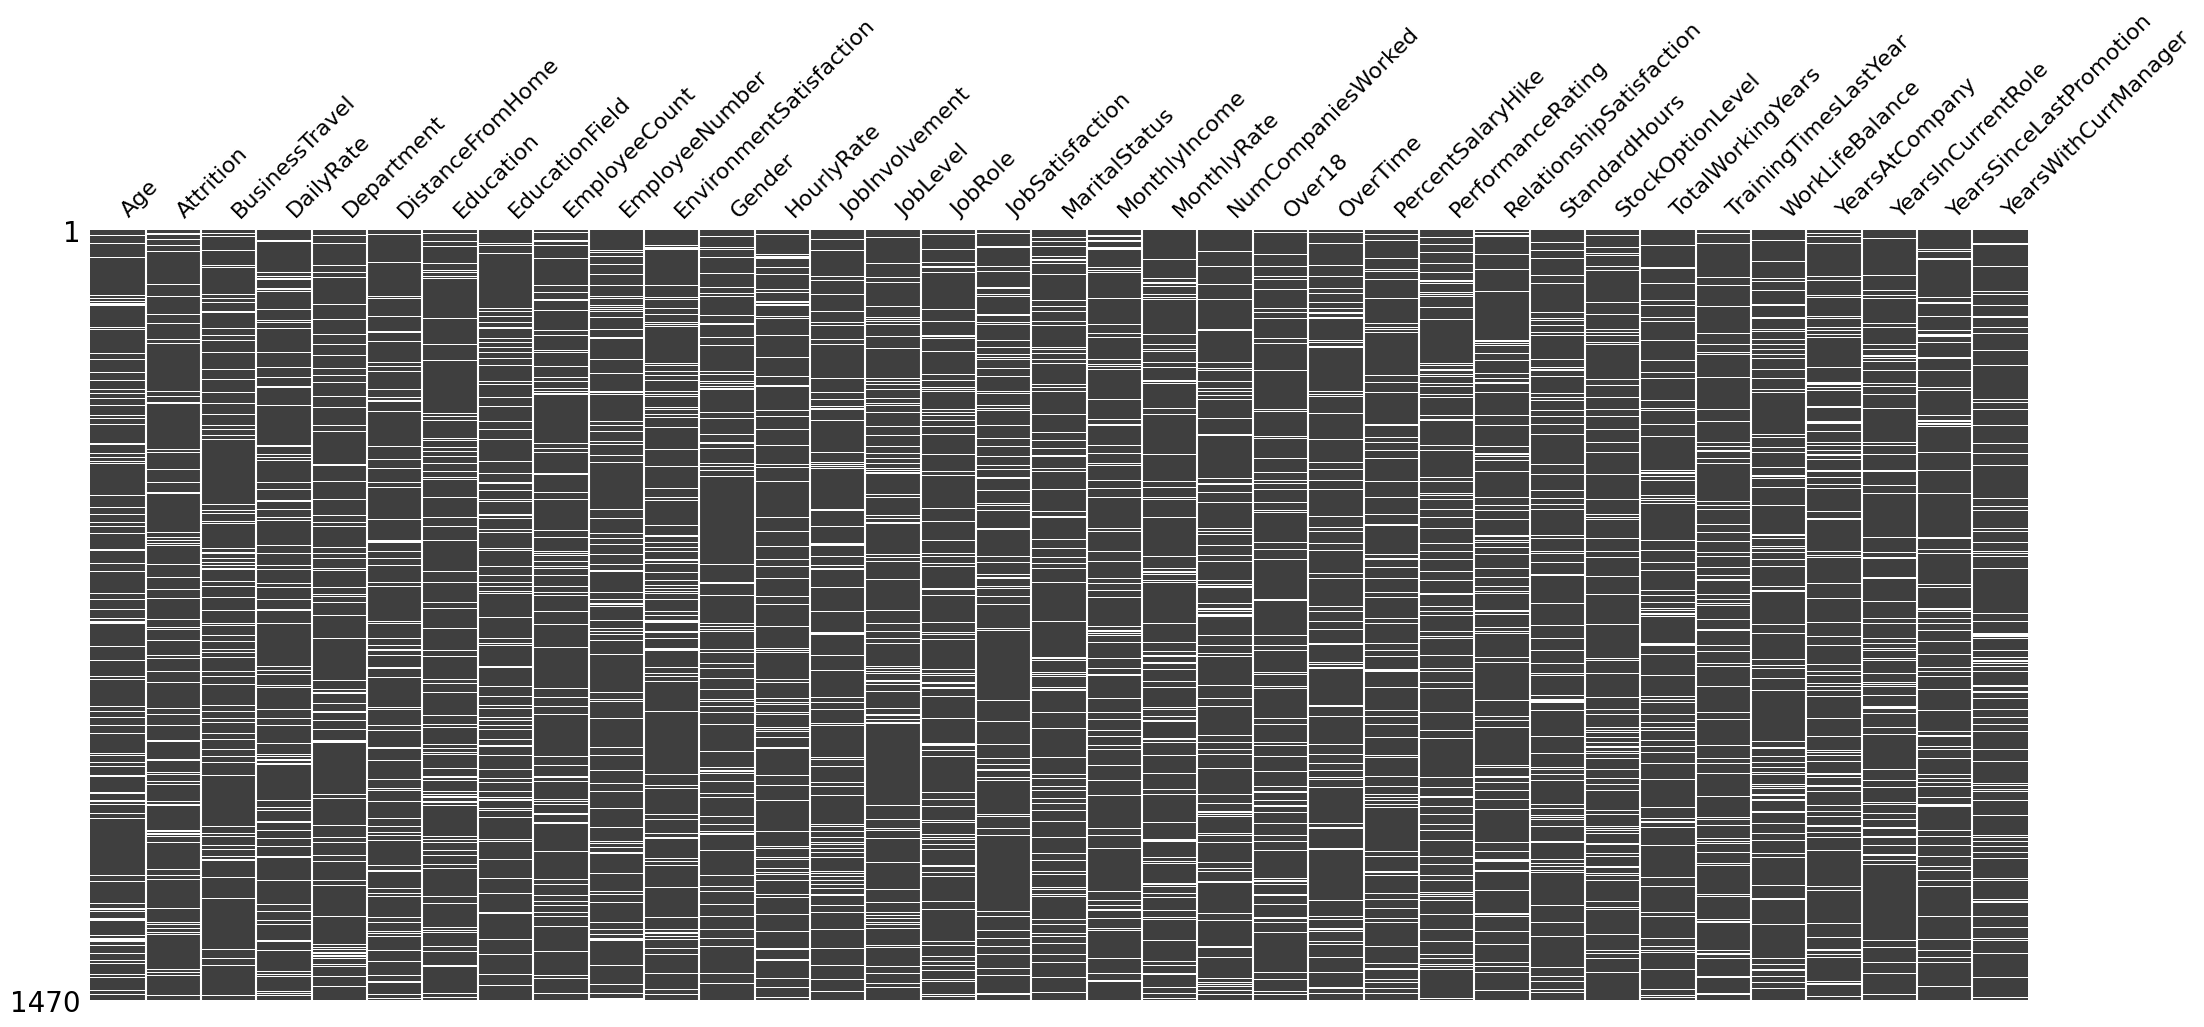

In [10]:
msno.matrix(df, sparkline=False)

#### Target variables

In [11]:
# business objectives are represented by features in the data
df[["JobSatisfaction", "PerformanceRating"]].describe()

,JobSatisfaction,PerformanceRating
count,1323.000000,1323.000000
mean,2.715272,3.149344
std,1.146786,0.476027
min,0.724192,2.116951
25%,1.846039,2.845502
50%,2.895032,3.064551
75%,3.676663,3.335525
max,5.251277,5.013371


In [12]:
df[["JobSatisfaction", "PerformanceRating"]].head()

,JobSatisfaction,PerformanceRating
0,3.397665,2.844897
1,1.584059,4.120281
2,3.301009,2.781168
3,3.220844,2.769576
4,1.697330,3.282183


In [13]:
# not sure if this works
def whole_numbers(df, var):
    df1 = df[(df[var] == 5) | (df[var] == 4) | (df[var] == 3) 
            | (df[var] == 2) | (df[var] == 1) | (df[var] == 0)]
    print(f"Number of target feature '{var}' as whole number: {len(df1)}")

def target_explore(df, var1, var2):
    whole_numbers(df, var1)
    whole_numbers(df, var2)

target_explore(df, "JobSatisfaction", "PerformanceRating")

Number of target feature 'JobSatisfaction' as whole number: 0
Number of target feature 'PerformanceRating' as whole number: 0


In [14]:
# target variables

In [15]:
#df["PerformanceRating"] = df["PerformanceRating"].fillna(df["PerformanceRating"].mean())

In [16]:
X1 = df["JobSatisfaction"]
X2 = df["PerformanceRating"]

In [17]:
#We can perform the test using those variables

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

Ttest_indResult(statistic=nan, pvalue=nan)

#### Baseline model

In [18]:
# baseline model
# impute missing data (which strategies to use)
# encode categories vs. drop
# model data

In [141]:
### Need more methods here

class BaselineModelEvaluator():
    # initialise this with dataframe when going over
    # it could possibly be used again later
    def __init__(self):
        self.counter = 1
        self.df = None

    def baseline_pipeline(self, X, y, tar, imputer, model, encoder, drop_second):
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

        # pipeline
        pipe = Pipeline([('imputer', imputer), ('model', model)])

        # impute in sequence
        X_train_imputed = pipe.named_steps['imputer'].fit_transform(X_train)
        X_test_imputed = pipe.named_steps['imputer'].transform(X_test)

        # Fit the model
        pipe.fit(X_train, y_train)

        # predictions
        y_pred = pipe.predict(X_test)

        # metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print evaluation metrics
        print(f"{self.counter}. Baseline model for predicting {tar}")
        self.counter += 1
        print(f"Using: {model}, {imputer}, {encoder}")
        print(f"Drop second target = {drop_second}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"R-squared (R2): {r2}")
        print("\n")

    def baseline_prepare(self, df, y, tar, imputer, model, encoder, impute_target, drop_second):
        # impute target or drop
        if impute_target:
            df[y] = df[y].fillna(df[y].mean())
        else:
            df = df.dropna(subset=[y])
        y = df[y]

        # keep second target variable or not
        targets = ["JobSatisfaction", "PerformanceRating"]
        X = df.drop(targets, axis=1) if drop_second else df.drop(tar, axis=1)

        # pipeline and print
        self.baseline_pipeline(X=X, y=y, tar=tar, imputer=imputer, model=model, encoder=encoder, drop_second=drop_second)

    def baseline_model(self, df, y=None, imputer=SimpleImputer(strategy='mean'), model=LinearRegression(),
                       encoder=LabelEncoder(), drop_second=True, impute_target=False):
        # don't overwrite original
        self.df = df.copy()

        # encoding categories
        categorical_columns = self.df.select_dtypes(include=['object']).columns.tolist()
        for column in categorical_columns:
            self.df[column] = encoder.fit_transform(self.df[column])

        # y isn't needed to evaluate both targets
        # set y to evaluate one target 
        if y is None:
            tar = "PerformanceRating"
            y = "PerformanceRating"
            self.baseline_prepare(self.df, y, tar, imputer=imputer, model=model, encoder=encoder, impute_target=impute_target, drop_second=drop_second)
            self.baseline_prepare(self.df, y, tar, imputer=imputer, model=model, encoder=encoder, impute_target=impute_target, drop_second=False)
            tar = "JobSatisfaction"
            y = "JobSatisfaction"
            self.baseline_prepare(self.df, y, tar, imputer=imputer, model=model, encoder=encoder, impute_target=impute_target, drop_second=drop_second)
            self.baseline_prepare(self.df, y, tar, imputer=imputer, model=model, encoder=encoder, impute_target=impute_target, drop_second=False)
        else:         
            tar = y
            self.baseline_prepare(self.df, y, tar, imputer=imputer, model=model, encoder=encoder, impute_target=impute_target, drop_second=drop_second)
            self.baseline_prepare(self.df, y, tar, imputer=imputer, model=model, encoder=encoder, impute_target=impute_target, drop_second=False)

        # reset model counter
        self.counter = 1
        
    def baseline_multi_model(self):
        # this method to run the different pipelines and parts of above model moved to init
            pass

In [137]:
# baseline model with mean imputation
evaluator = BaselineModelEvaluator()
evaluator.baseline_model(df)

1. Baseline model for predicting PerformanceRating
Using: LinearRegression(), SimpleImputer(), LabelEncoder()
Drop second target = True
Mean Squared Error (MSE): 0.19805391146870718
R-squared (R2): 0.18314247715822995


2. Baseline model for predicting PerformanceRating
Using: LinearRegression(), SimpleImputer(), LabelEncoder()
Drop second target = False
Mean Squared Error (MSE): 0.19803085442843596
R-squared (R2): 0.1832375740773483


3. Baseline model for predicting JobSatisfaction
Using: LinearRegression(), SimpleImputer(), LabelEncoder()
Drop second target = True
Mean Squared Error (MSE): 1.2168218524726329
R-squared (R2): -0.03480979523856864


4. Baseline model for predicting JobSatisfaction
Using: LinearRegression(), SimpleImputer(), LabelEncoder()
Drop second target = False
Mean Squared Error (MSE): 1.224850125725057
R-squared (R2): -0.04163720040357188




In [139]:
# baseline model with knnimputer

evaluator.baseline_model(df, imputer=KNNImputer())

1. Baseline model for predicting PerformanceRating
Using: LinearRegression(), KNNImputer(), LabelEncoder()
Drop second target = True
Mean Squared Error (MSE): 0.19952067990472133
R-squared (R2): 0.1770929080164746


2. Baseline model for predicting PerformanceRating
Using: LinearRegression(), KNNImputer(), LabelEncoder()
Drop second target = False
Mean Squared Error (MSE): 0.1996654544213017
R-squared (R2): 0.17649579709800067


3. Baseline model for predicting JobSatisfaction
Using: LinearRegression(), KNNImputer(), LabelEncoder()
Drop second target = True
Mean Squared Error (MSE): 1.2048232498163045
R-squared (R2): -0.024605942034655826


4. Baseline model for predicting JobSatisfaction
Using: LinearRegression(), KNNImputer(), LabelEncoder()
Drop second target = False
Mean Squared Error (MSE): 1.2146006322460765
R-squared (R2): -0.0329208248497217




## 4. Data Preparation